# LinkedIn Learning - Introducing Jupyter

# Chapter 1
***


In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [132]:
greeting = "Hello Jupyter!"

In [133]:
greeting

'Hello Jupyter!'

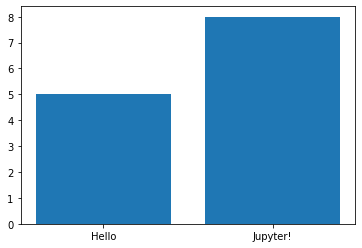

In [134]:
#Length of words in greeting
words = greeting.split(" ")

word_length = [len(w) for w in words]
plt.bar(words,word_length)
plt.show()

## Chapter 2

## Chapter 3

In [135]:
df = pd.read_csv("Environmental_Data_Deep_Moor_2015.csv")

In [136]:
?plt.plot

In [137]:
# %load hours_dict.py

def hours_dict(date):
    day = df[df['date']==date]
    hours = [time.split(':')[0] for time in day['time']]
    hours_dict = {i:hours.count(str(i)) for i in np.arange(24)}
    return hours_dict


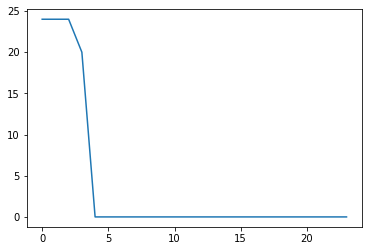

In [138]:
feb15 = hours_dict('2015_02_15')
plt.plot(feb15.keys(), feb15.values())
plt.show()

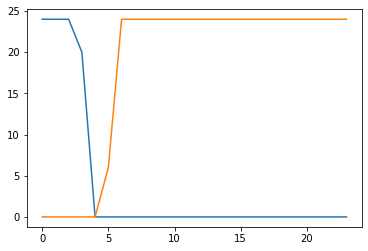

In [139]:
feb15 = hours_dict('2015_02_15')
feb16 = hours_dict('2015_02_16')
plt.plot(feb15.keys(), feb15.values())
plt.plot(feb16.keys(), feb16.values())
plt.show()

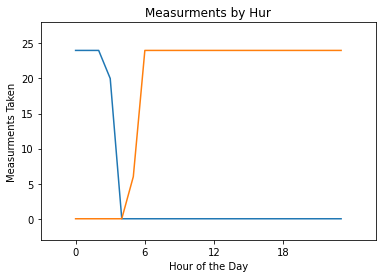

In [140]:
feb15 = hours_dict('2015_02_15')
feb16 = hours_dict('2015_02_16')
plt.plot(feb15.keys(), feb15.values())
plt.plot(feb16.keys(), feb16.values())
plt.xticks(np.arange(0,24,6))
plt.xlim(-3,26)
plt.ylim(-3,28)
plt.xlabel("Hour of the Day")
plt.ylabel("Measurments Taken")
plt.title("Measurments by Hur")
plt.show()

In [141]:
# %load helper_funcs/get_df.py
def get_df(yr):
    return pd.read_csv("Environmental_Data_Deep_Moor_{}.csv".format(yr))

In [142]:
# %load helper_funcs/line_helpers.py
def monthly_avg_calc(mo,col):
    return df[df['date'].str.contains('201[2345]_[0]?'+ str(mo))][col].mean()


In [143]:
# %load helper_funcs/get_seasons.py
def get_seasons(yr):
    df = get_df(yr)
    return [df[df['date'].between('{}_03_20'.format(yr),'{}_06_19'.format(yr))],
            df[df['date'].between('{}_06_20'.format(yr),'{}_09_21'.format(yr))],
            df[df['date'].between('{}_09_22'.format(yr),'{}_12_20'.format(yr))],
            df[~df['date'].between('{}_03_20'.format(yr),'{}_12_20'.format(yr))]]

In [144]:
seasons = ["Spring", "Summer", "Fall", "Winter"]

In [145]:
# %load helper_funcs/table_helpers.py
def max_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].max()]

def min_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].min()]


def min_max_temps(yr):
    return [(max_temp(s)['Air_Temp'].values[0],
             max_temp(s)['date'].values[0],
             min_temp(s)['Air_Temp'].values[0],
             min_temp(s)['date'].values[0]
            ) for s in get_seasons(yr)]

In [146]:
def yearly_avg(category):
   return list(map(lambda m: monthly_avg_calc(m,category), range(1,13)))

In [147]:
df = get_df('2014')

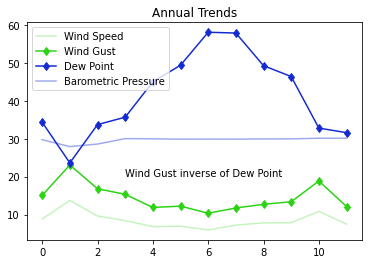

In [148]:
plt.plot(yearly_avg('Wind_Speed'), label='Wind Speed', color="#2BD31444")
plt.plot(yearly_avg('Wind_Gust'),'d-', label = 'Wind Gust', color="#2BD314FF")
plt.plot(yearly_avg('Dew_Point'),'d-', label = 'Dew Point', color="#142BD3FF")
plt.plot(yearly_avg('Barometric_Press'), label = 'Barometric Pressure', color="#142BD366")
plt.legend()
plt.title("Annual Trends")
plt.text(3,20,"Wind Gust inverse of Dew Point")
plt.show()

In [149]:
heights = [season['Air_Temp'].mean() for season in get_seasons('2013')]
alphas = [height/max(heights) for height in heights]
colors = [(.2, .7, .3, a) for a in alphas]

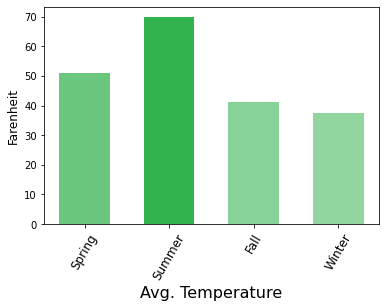

In [150]:
plt.bar(seasons, heights, .6, color = colors)
plt.ylabel("Farenheit", fontsize=12)
plt.xlabel("Avg. Temperature", fontsize=16)
plt.xticks(rotation=60, fontsize=12)
plt.show()

In [151]:
heights14 = [season['Air_Temp'].mean() for season in get_seasons('2014')]
alphas14 = [height/max(heights14) for height in heights14]
colors14 = [(.4, .2, .5, a) for a in alphas14]

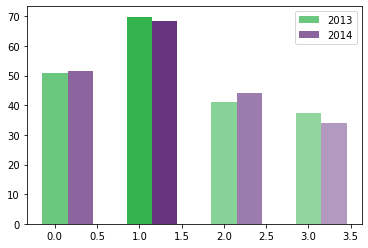

In [152]:
index = np.arange(4)
fig, ax = plt.subplots()
rects1 = ax.bar(index, heights, .3, color = colors, label='2013')
rects2 = ax.bar(index + .3, heights14, .3, color = colors14, label = '2014')
ax.legend()
plt.show()

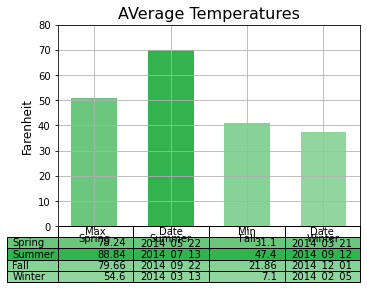

In [155]:
plt.bar(seasons, heights, .6, align='center', color=colors)
plt.title('AVerage Temperatures',fontsize=16)
plt.ylabel('Farenheit', fontsize=12)
rows = seasons
columns = ["Max", "Date","Min","Date"]
plt.table(cellText=min_max_temps('2014'),
         rowLabels=rows,
         colLabels=columns,
         rowColours=colors,
         cellColours=[[c]*4 for c in colors],
         loc='bottom')
plt.ylim(0,80)
plt.grid(True)
plt.subplots_adjust(left=0.2, bottom=.1, top=.8)
plt.show()

## Chapter 4